# STEP-1 BUSSINESS PROBLEM UNDERSTANDING
***
-Housing finance company  wants deals in all kinds of home loans.They have presence across all urban,semi urban and rural areas.Customers first applies for the home loan and after that company validates the customer eligibility for loan.

Company wants to  automate the loan eligibility process(real time)based on customer detail provided while filling online application form.These details are gender ,marital status,education,number of dependents,income,loan amount,credit history and others.To automate this process ,they have provided a dataset to identify the customers segments that are eligible for loan amount so that can specifically target these customers.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("LoanApprovalPrediction.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# STEP-2 DATA UNDERSTANDING
***

* **Loan_ID**:unique loan id
* **Gender**:Male/Female
* **Married**:marital status
* **Dependents**:number of dependents
* **Education**:Applicant education
* **Self_Employed**:whether applicant is self employed
* **ApplicantIncom**8:income of applicant
* **CoapplicantIncom**8:income of coapplicant
* **LoanAmount**:loan amount in thousands
* **Loan_Amount_Term**:term of loan amount in months
* **Credit_History**:credit history meets guidelines
* **Property_Area**:Urban/Semi urban/Rural
* **Loan_Status**:loan apporved or ot ,target variable



In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB


In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data["Loan_ID"].nunique()

598

In [8]:
#drop unimportant columns as per feature selection(filter method)

data.drop(columns=['Loan_ID'],inplace=True)

In [9]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
594,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
595,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
596,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [10]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [11]:
data["Gender"].value_counts()

Gender
Male      487
Female    111
Name: count, dtype: int64

* gender has no missing value
* male are larger in number

In [13]:
data["Married"].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
data["Married"].value_counts()

Married
Yes    388
No     210
Name: count, dtype: int64

* in data there are more number of married people

In [16]:
data["Dependents"].unique()

array([ 0.,  1.,  2.,  3., nan])

In [17]:
data["Dependents"].value_counts()

Dependents
0.0    338
1.0    101
2.0     99
3.0     48
Name: count, dtype: int64

* dependents has missing values 

In [19]:
data["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [20]:
data["Education"].value_counts()

Education
Graduate        465
Not Graduate    133
Name: count, dtype: int64

In [21]:
data["Self_Employed"].unique()

array(['No', 'Yes'], dtype=object)

In [22]:
data["Self_Employed"].value_counts()

Self_Employed
No     488
Yes    110
Name: count, dtype: int64

In [23]:
#create new columns as per requirement 
data['Income']=data['ApplicantIncome']+data['CoapplicantIncome']
data.drop(columns=['ApplicantIncome','CoapplicantIncome'],inplace=True)
data

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0.0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...
593,Female,No,0.0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
594,Male,Yes,3.0,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
595,Male,Yes,1.0,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
596,Male,Yes,2.0,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [24]:
data['Income'].describe()

count      598.000000
mean      6923.752375
std       6220.893093
min       1442.000000
25%       4154.750000
50%       5416.500000
75%       7452.500000
max      81000.000000
Name: Income, dtype: float64

In [25]:
data["LoanAmount"].describe()

count    577.000000
mean     144.968804
std       82.704182
min        9.000000
25%      100.000000
50%      127.000000
75%      167.000000
max      650.000000
Name: LoanAmount, dtype: float64

In [26]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [27]:
data['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    500
180.0     43
480.0     14
300.0     12
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [28]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [29]:
data['Credit_History']=data['Credit_History'].replace({1:"good",0:"bad"})

In [30]:
data['Credit_History']

0      good
1      good
2      good
3      good
4      good
       ... 
593    good
594    good
595    good
596    good
597     bad
Name: Credit_History, Length: 598, dtype: object

In [31]:
data['Credit_History'].value_counts()

Credit_History
good    463
bad      86
Name: count, dtype: int64

In [32]:
data['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [33]:
data['Property_Area'].value_counts()

Property_Area
Semiurban    225
Urban        198
Rural        175
Name: count, dtype: int64

In [34]:
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [35]:
data['Loan_Status'].value_counts()

Loan_Status
Y    411
N    187
Name: count, dtype: int64

In [36]:
continous=['Income','LoanAmount']
discrete_categorical=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Credit_History']
discrete_count=['Dependents','Loan_Amount_Term']

***
### 2.2 EXPLORATARY DATA ANALYSIS(EDA)

In [38]:
data[continous].describe()

,Income,LoanAmount
count,598.000000,577.000000
mean,6923.752375,144.968804
std,6220.893093,82.704182
min,1442.000000,9.000000
25%,4154.750000,100.000000
50%,5416.500000,127.000000
75%,7452.500000,167.000000
max,81000.000000,650.000000


In [39]:
data[continous].corr()

,Income,LoanAmount
Income,1.000000,0.592283
LoanAmount,0.592283,1.000000


In [40]:
data[continous].skew()

Income        5.858268
LoanAmount    2.532073
dtype: float64

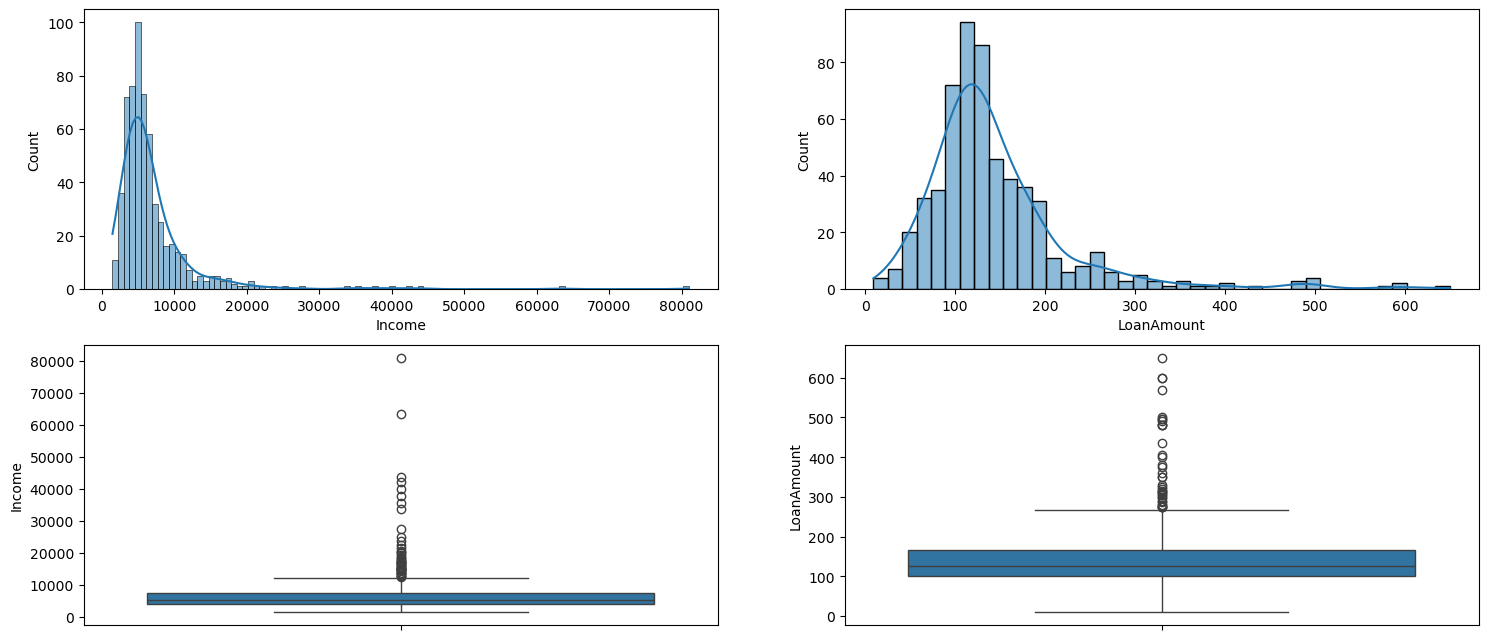

In [41]:
'''univarite analysis on continous data---single variable(income,loanamount)
   1.histogram
   2.boxplot '''

plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,2,1)
sns.histplot(data['Income'],kde=True)

plt.subplot(2,2,2)
sns.histplot(data['LoanAmount'],kde=True)

plt.subplot(2,2,3)
sns.boxplot(data['Income'])

plt.subplot(2,2,4)
sns.boxplot(data['LoanAmount'])

plt.show()


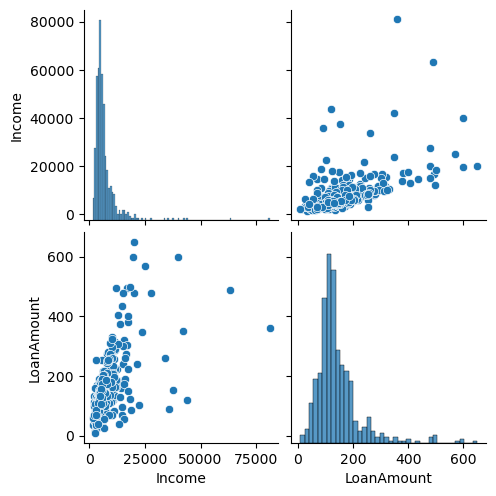

In [42]:
'''multivarite analysis on continous data---two variables(income,loanamount)
   1.pair plot
   2.heat map'''
sns.pairplot(data[continous])
plt.show()


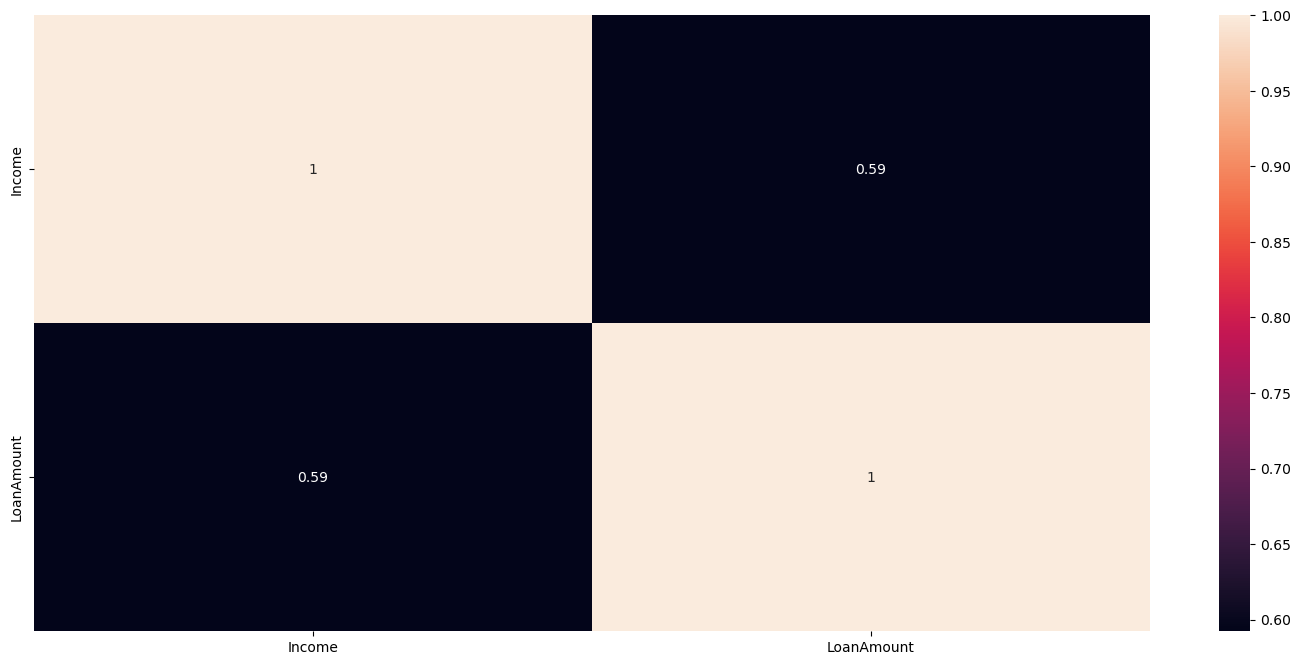

In [43]:
sns.heatmap(data[continous].corr(),annot=True)
plt.show()

In [44]:
#discrete-categorical data
data[discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status,Credit_History
count,598,598,598,598,598,598,549
unique,2,2,2,2,3,2,2
top,Male,Yes,Graduate,No,Semiurban,Y,good
freq,487,388,465,488,225,411,463


In [45]:
#let us compare all categories wrt LoanStatus to understand overall importances

print('impact of Gender on loan status')
print(pd.crosstab(data['Loan_Status'],data['Gender']))
print('\n')

print('impact of Married on loan status')
print(pd.crosstab(data['Loan_Status'],data['Married']))
print('\n')

print('impact of education on loan status')
print(pd.crosstab(data['Loan_Status'],data['Education']))
print('\n')

print('impact of selfemployed on loan status')
print(pd.crosstab(data['Loan_Status'],data['Self_Employed']))
print('\n')

print('impact of property area on loan status')
print(pd.crosstab(data['Loan_Status'],data['Property_Area']))
print('\n')

print('impact of Credithistory on loan status')
print(pd.crosstab(data['Loan_Status'],data['Credit_History']))
print('\n')

print('impact of dependents loan status')
print(pd.crosstab(data['Loan_Status'],data['Dependents']))
print('\n')

print('impact of Loan_Amount_Term on loan status')
print(pd.crosstab(data['Loan_Status'],data['Loan_Amount_Term']))

impact of Gender on loan status
Gender       Female  Male
Loan_Status              
N                37   150
Y                74   337


impact of Married on loan status
Married       No  Yes
Loan_Status          
N             78  109
Y            132  279


impact of education on loan status
Education    Graduate  Not Graduate
Loan_Status                        
N                 136            51
Y                 329            82


impact of selfemployed on loan status
Self_Employed   No  Yes
Loan_Status            
N              152   35
Y              336   75


impact of property area on loan status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 67         52     68
Y                108        173    130


impact of Credithistory on loan status
Credit_History  bad  good
Loan_Status              
N                79    95
Y                 7   368


impact of dependents loan status
Dependents   0.0  1.0  2.0  3.0
Loan_Status    

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

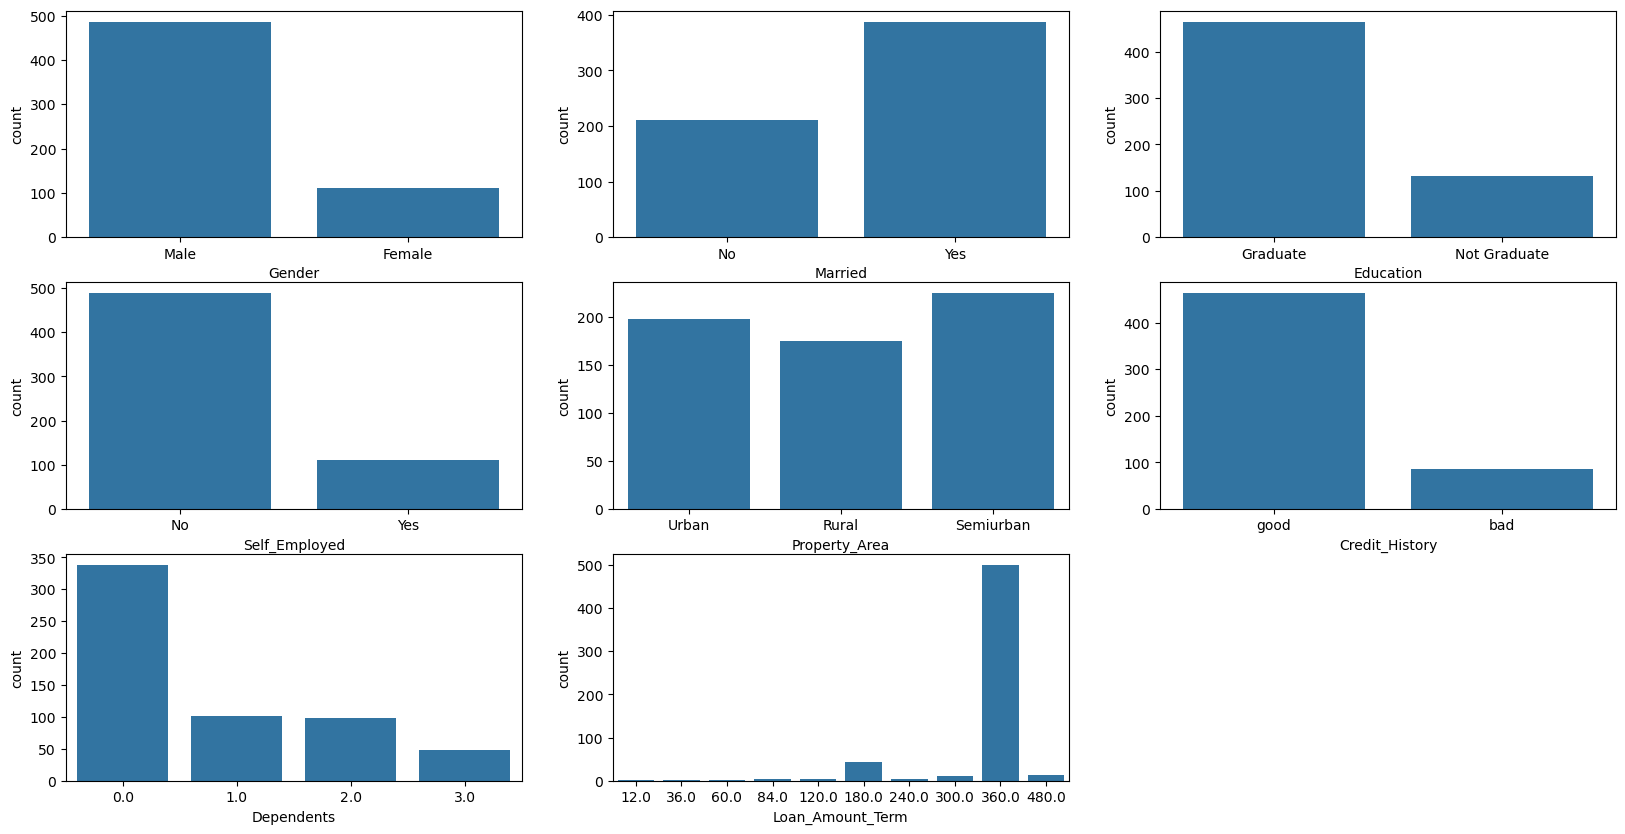

In [46]:
plt.rcParams['figure.figsize']=(20,10)

plt.subplot(3,3,1)
sns.countplot(x=data['Gender'])

plt.subplot(3,3,2)
sns.countplot(x=data['Married'])

plt.subplot(3,3,3)
sns.countplot(x=data['Education'])

plt.subplot(3,3,4)
sns.countplot(x=data['Self_Employed'])

plt.subplot(3,3,5)
sns.countplot(x=data['Property_Area'])

plt.subplot(3,3,6)
sns.countplot(x=data['Credit_History'])

plt.subplot(3,3,7)
sns.countplot(x=data['Dependents'])

plt.subplot(3,3,8)
sns.countplot(x=data['Loan_Amount_Term'])



***
# STEP-3 DATA PREPROCESSING

## 1.Data cleaning

   * treating wrong data
   * treating missing values
   * treating wrong data type
   * duplicates
   * outliers

## 2.Data Wrangling

   * encoding(applicable for discrete categorical)
   * transformation(applicable on continous)
   * scaling(applicable on continous)

**Dont apply any data wrangling techniques on discrete count variable**

## 3.Train-Test split

In [48]:
#no wrong data

In [49]:
#check for missing values 
data.isnull().sum()

Gender               0
Married              0
Dependents          12
Education            0
Self_Employed        0
LoanAmount          21
Loan_Amount_Term    14
Credit_History      49
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [50]:
data['Dependents']=data['Dependents'].fillna(0)
# income,loanamount,loanamountterm,credit history we cant fill missing values .. so drop the missing values
data=data.dropna(subset=['Income','LoanAmount','Loan_Amount_Term','Credit_History'])

In [51]:
data.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

In [52]:
#no wrong data types

In [53]:
data.duplicated().sum()

0

In [54]:
#no duplicates
#outliers should be retained because really some people will high income and fe people may apply for larger loan amount

In [55]:
#DATA WRANGLING

#encoding------- you can use ordinal encoder for Property area and,,,,, remaning all nominal encoder

data['Gender']=data['Gender'].replace({'Male':1,'Female':0})
data['Married']=data['Married'].replace({'Yes':1,'No':0})
data['Education']=data['Education'].replace({'Graduate':1,'Not Graduate':0})
data['Self_Employed']=data['Self_Employed'].replace({'Yes':1,'No':0})
data['Property_Area']=data['Property_Area'].replace({'Rural':0,
                                                    'Semiurban':1,
                                                    'Urban':2})
data['Credit_History']=data['Credit_History'].replace({'good':1,'bad':0})
                                                    


In [56]:
data


,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
1,1,1,1.0,1,0,128.0,360.0,1,0,N,6091.0
2,1,1,0.0,1,1,66.0,360.0,1,2,Y,3000.0
3,1,1,0.0,0,0,120.0,360.0,1,2,Y,4941.0
4,1,0,0.0,1,0,141.0,360.0,1,2,Y,6000.0
5,1,1,2.0,1,1,267.0,360.0,1,2,Y,9613.0
...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0.0,1,0,71.0,360.0,1,0,Y,2900.0
594,1,1,3.0,1,0,40.0,180.0,1,0,Y,4106.0
595,1,1,1.0,1,0,253.0,360.0,1,2,Y,8312.0
596,1,1,2.0,1,0,187.0,360.0,1,2,Y,7583.0


In [57]:
#TRANSFORMATIONS

#for this data log and root transformation are not suitable


from scipy.stats import boxcox
data['Income'],_=boxcox(data['Income'])
data['LoanAmount'],_=boxcox(data['LoanAmount'])
data[continous].skew()

Income       -0.027473
LoanAmount    0.044914
dtype: float64

In [58]:
#X&y
X=data.drop('Loan_Status',axis=1)
y=data['Loan_Status']


In [59]:
# identifying best random state 

Train=[]
Test=[]
cv=[]

for i in range(1,101):
    from sklearn.model_selection import train_test_split
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=i)

    from sklearn.linear_model import LogisticRegression
    model=LogisticRegression()
    model.fit(X_train,y_train)

    ypred_train=model.predict(X_train)
    ypred_test=model.predict(X_test)

    from sklearn.metrics import accuracy_score
    Train.append(accuracy_score(ypred_train,y_train))

    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy').mean())
    
    
    Test.append(accuracy_score(ypred_test,y_test))

em=pd.DataFrame({'Train':Train,'Test':Test,'cv':cv})
gm=em[(abs(em['Train']-em['Test'])<=0.05)&(abs(em['Test']-em['cv'])<=0.05)]
rs=gm[gm['cv']==gm['cv'].max()].index.to_list()[0]
print('best random state:',rs)

best random state: 20


In [60]:
#train_test split


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=20)

# STEP-4 MODELLING AND EVALUTION


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


## 1--LOGISTIC REGRESSION
### 1.MODELLING AND EVALUATION¶

In [65]:
log_model=model.fit(X_train,y_train)

ypred_train=log_model.predict(X_train)
ypred_test=log_model.predict(X_test)

print("train accuracy",accuracy_score(ypred_train,y_train))
print("cv",cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy').mean())

print("test accuracy",accuracy_score(ypred_test,y_test))

train accuracy 0.8131067961165048
cv 0.8131060828680576
test accuracy 0.8155339805825242


## 2--KNN
### 1.HPT
### 2.MODELLING AND EVALUATION

In [67]:
#HYPERPARAMETER TUNING

estimator=KNeighborsClassifier()
Param_grid={'n_neighbors':list(range(1,50))}

knn_grid=GridSearchCV(estimator,Param_grid,scoring='accuracy',cv=5)
knn_grid.fit(X_train,y_train)

knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [68]:
#MODELING AND EVALUATION

knn_model=KNeighborsClassifier(n_neighbors=10)
knn_model.fit(X_train,y_train)

ypred_train=knn_model.predict(X_train)
ypred_test=knn_model.predict(X_test)

print("train accuracy",accuracy_score(ypred_train,y_train))
print("cv",cross_val_score(log_model,X_train,y_train,cv=5,scoring='accuracy').mean())

print("test accuracy",accuracy_score(ypred_test,y_test))

train accuracy 0.779126213592233
cv 0.8131060828680576
test accuracy 0.7378640776699029


## 4-- DECISION TREE
### 1.HPT
### 2.IMPORTANT FEATURES BY USING FEATURE SELECTION METHOD(ENSEMBLE METHOD)
### 3.MODELLING AND EVALUATION

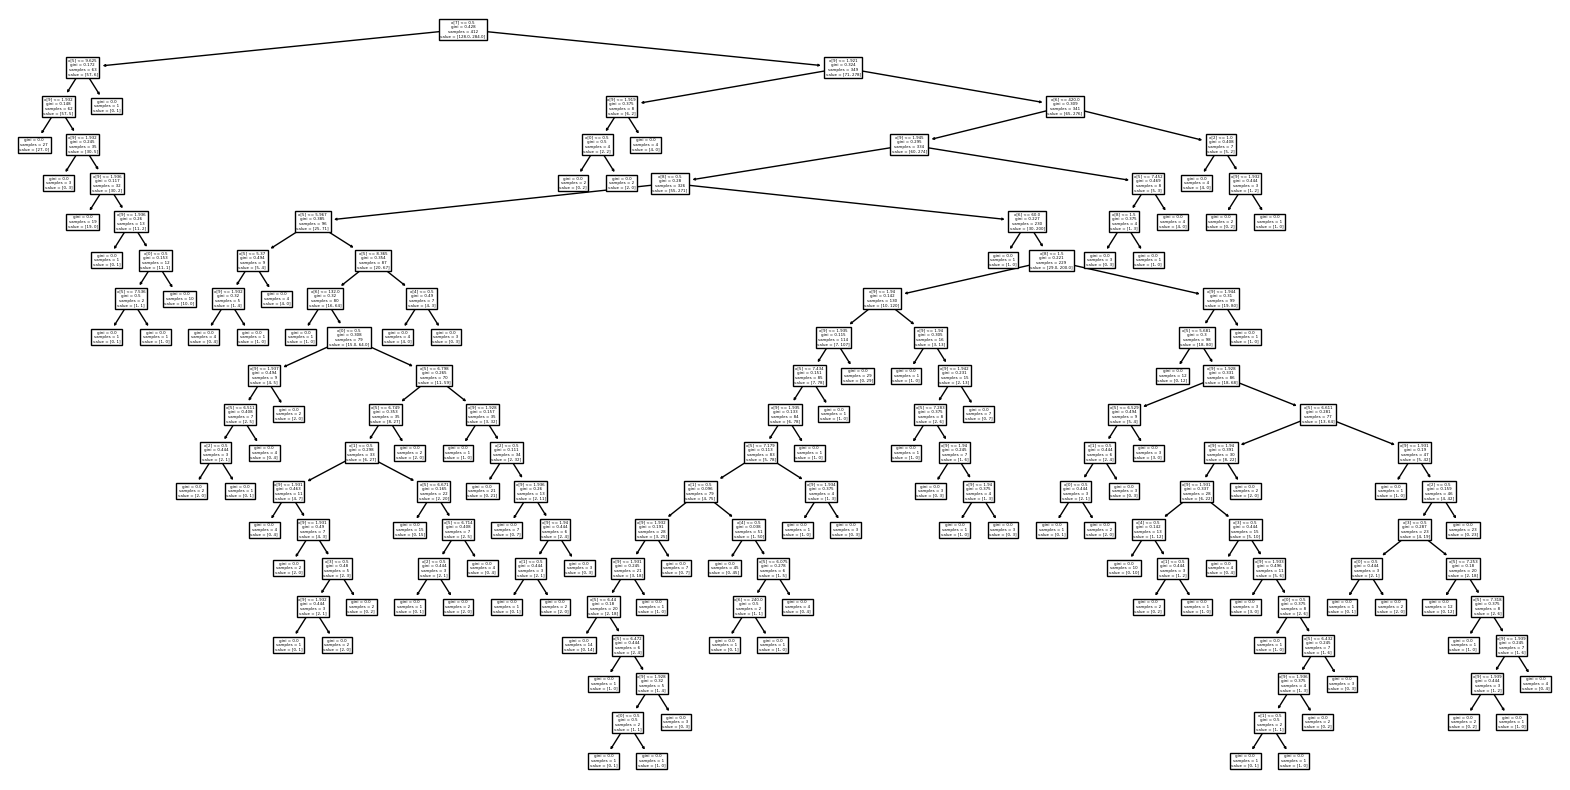

In [70]:
dt_model=DecisionTreeClassifier(random_state=True)
dt_model.fit(X_train,y_train)

from sklearn.tree import plot_tree
plot_tree(dt_model)
plt.show()

In [71]:
#HYPERPARAMETER TUNING

estimator=DecisionTreeClassifier(random_state=True)
Param_grid={'criterion':['gini','entropy'],'max_depth':list(range(1,20))}

dt_grid=GridSearchCV(estimator,Param_grid,scoring='accuracy',cv=5)
dt_grid.fit(X_train,y_train)

dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=True)

In [72]:
dt=dt_grid.best_estimator_
dt.feature_importances_

array([0.02624983, 0.01999987, 0.        , 0.01312492, 0.        ,
       0.02183454, 0.05144553, 0.68902036, 0.        , 0.17832495])

In [73]:
#IMPORTANT FEATURES

feats_dt=pd.DataFrame(data=dt.feature_importances_,index=X.columns,columns=['importance'])
important_features_dt=feats_dt[feats_dt['importance']>0].index.tolist()
important_features_dt

['Gender',
 'Married',
 'Education',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Income']

In [74]:
# modeling and evaluation

X_train_dt=X_train[important_features_dt]
X_test_dt=X_test[important_features_dt]

dt.fit(X_train_dt,y_train)

ypred_train=dt.predict(X_train_dt)
ypred_test=dt.predict(X_test_dt)

print("train accuracy",accuracy_score(ypred_train,y_train))
print("cv",cross_val_score(dt,X_train_dt,y_train,cv=5,scoring='accuracy').mean())

print("test accuracy",accuracy_score(ypred_test,y_test))

train accuracy 0.8519417475728155
cv 0.8179547458125184
test accuracy 0.7864077669902912


## 5--RANDOM FOREST
### 1.HPT
### 2.IMPORTANT FEATURES BY USING FEATURE SELECTION METHOD(ENSEMBLE METHOD)
### 3.MODELLING AND EVALUATION

In [76]:
#HYPERPARAMETER TUNING

estimator=RandomForestClassifier(random_state=True)
Param_grid={'n_estimators':list(range(1,50))}

rf_grid=GridSearchCV(estimator,Param_grid,scoring='accuracy',cv=5)
rf_grid.fit(X_train,y_train)

rf_grid.best_estimator_

RandomForestClassifier(n_estimators=24, random_state=True)

In [77]:
rf=rf_grid.best_estimator_
rf.feature_importances_

array([0.02460033, 0.03043514, 0.05565081, 0.0240995 , 0.02420159,
       0.21937741, 0.05147374, 0.2660049 , 0.05897045, 0.24518614])

In [78]:
#IMPORTANT FEATURES

feats_rf=pd.DataFrame(data=rf.feature_importances_,index=X.columns,columns=['importance'])
important_features_rf=feats_rf[feats_rf['importance']>0].index.tolist()
important_features_rf

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [79]:
# modeling and evaluation

X_train_dt=X_train[important_features_dt]
X_test_dt=X_test[important_features_dt]

rf.fit(X_train_dt,y_train)

ypred_train=rf.predict(X_train_dt)
ypred_test=rf.predict(X_test_dt)

print("train accuracy",accuracy_score(ypred_train,y_train))
print("cv",cross_val_score(rf,X_train_dt,y_train,cv=5,scoring='accuracy').mean())

print("test accuracy",accuracy_score(ypred_test,y_test))

train accuracy 1.0
cv 0.7912430208639435
test accuracy 0.7766990291262136


## 6--ADABOOST
### 1.HPT
### 2.IMPORTANT FEATURES BY USING FEATURE SELECTION METHOD(ENSEMBLE METHOD)
### 3.MODELLING AND EVALUATION

In [81]:
#HYPERPARAMETER TUNING

estimator=AdaBoostClassifier(random_state=True)
Param_grid={'n_estimators':list(range(1,50))}

ab_grid=GridSearchCV(estimator,Param_grid,scoring='accuracy',cv=5)
ab_grid.fit(X_train,y_train)

ab_grid.best_estimator_

AdaBoostClassifier(n_estimators=20, random_state=True)

In [82]:
ab=ab_grid.best_estimator_
ab.feature_importances_

array([0.  , 0.05, 0.  , 0.  , 0.  , 0.2 , 0.05, 0.05, 0.15, 0.5 ])

In [83]:
#IMPORTANT FEATURES

feats_ab=pd.DataFrame(data=ab.feature_importances_,index=X.columns,columns=['importance'])
important_features_ab=feats_ab[feats_ab['importance']>0].index.tolist()
important_features_ab

['Married',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [84]:
# modeling and evaluation

X_train_dt=X_train[important_features_dt]
X_test_dt=X_test[important_features_dt]

ab.fit(X_train_dt,y_train)

ypred_train=ab.predict(X_train_dt)
ypred_test=ab.predict(X_test_dt)

print("train accuracy",accuracy_score(ypred_train,y_train))
print("cv",cross_val_score(ab,X_train_dt,y_train,cv=5,scoring='accuracy').mean())

print("test accuracy",accuracy_score(ypred_test,y_test))

train accuracy 0.8519417475728155
cv 0.7984425506905671
test accuracy 0.7766990291262136


## 7--GRADIENTBOOSTING
### 1.HPT
### 2.IMPORTANT FEATURES BY USING FEATURE SELECTION METHOD(ENSEMBLE METHOD)
### 3.MODELLING AND EVALUATION

In [86]:
#HYPERPARAMETER TUNING

estimator=GradientBoostingClassifier(random_state=True)
Param_grid={'n_estimators':list(range(1,50))}

gb_grid=GridSearchCV(estimator,Param_grid,scoring='accuracy',cv=5)
gb_grid.fit(X_train,y_train)

gb_grid.best_estimator_

GradientBoostingClassifier(n_estimators=6, random_state=True)

In [87]:
gb=gb_grid.best_estimator_
gb.feature_importances_

array([0.01549319, 0.        , 0.        , 0.003566  , 0.        ,
       0.02982629, 0.03882414, 0.78376496, 0.04136003, 0.08716538])

In [88]:
#IMPORTANT FEATURES

feats_gb=pd.DataFrame(data=gb.feature_importances_,index=X.columns,columns=['importance'])
important_features_gb=feats_gb[feats_gb['importance']>0].index.tolist()
important_features_gb

['Gender',
 'Education',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [89]:
# modeling and evaluation

X_train_dt=X_train[important_features_dt]
X_test_dt=X_test[important_features_dt]

gb.fit(X_train_dt,y_train)

ypred_train=gb.predict(X_train_dt)
ypred_test=gb.predict(X_test_dt)

print("train accuracy",accuracy_score(ypred_train,y_train))
print("cv",cross_val_score(gb,X_train_dt,y_train,cv=5,scoring='accuracy').mean())

print("test accuracy",accuracy_score(ypred_test,y_test))

train accuracy 0.8276699029126213
cv 0.8131354687040846
test accuracy 0.7961165048543689


## 8--XGBOOST
### 1.HPT
### 2.IMPORTANT FEATURES BY USING FEATURE SELECTION METHOD(ENSEMBLE METHOD)
### 3.MODELLING AND EVALUATION

In [91]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

# Step 1: Encode target
le = LabelEncoder()
y = le.fit_transform(y)  # ['N', 'Y'] -> [0, 1]

# Step 2: Train/test split AFTER encoding
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=20)

# Step 3: Define model and hyperparameter grid
estimator = XGBClassifier(random_state=20)
Param_grid = {
    'n_estimators': [10, 20, 30, 100],
    'learning_rate': [0.01, 0.1, 0.5, 1],  # avoid 0
    'max_depth': [3, 4, 5, 10, 15],
    'gamma': [0, 0.2, 0.5, 1]
}

# Step 4: GridSearchCV
xgb_grid = GridSearchCV(estimator, Param_grid, scoring='accuracy', cv=5)
xgb_grid.fit(X_train, y_train)

# Step 5: Best estimator
print("Best Parameters:", xgb_grid.best_params_)



Best Parameters: {'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [92]:
xgb=xgb_grid.best_estimator_
xgb.feature_importances_

array([0.04878342, 0.07702816, 0.06626383, 0.03441619, 0.06886753,
       0.05314441, 0.05040324, 0.48486507, 0.0607597 , 0.05546851],
      dtype=float32)

In [93]:
#IMPORTANT FEATURES

feats_xgb=pd.DataFrame(data=xgb.feature_importances_,index=X.columns,columns=['importance'])
important_features_xgb=feats_xgb[feats_xgb['importance']>0].index.tolist()
important_features_xgb

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Income']

In [94]:
# modeling and evaluation

X_train_dt=X_train[important_features_dt]
X_test_dt=X_test[important_features_dt]

gb.fit(X_train_dt,y_train)

ypred_train=gb.predict(X_train_dt)
ypred_test=gb.predict(X_test_dt)

print("train accuracy",accuracy_score(ypred_train,y_train))
print("cv",cross_val_score(gb,X_train_dt,y_train,cv=5,scoring='accuracy').mean())

print("test accuracy",accuracy_score(ypred_test,y_test))

train accuracy 0.8186528497409327
cv 0.8057609057609059
test accuracy 0.7984496124031008


In [183]:
#save the best model

from joblib import dump
dump(log_model,'loan_predict_model')

['loan_predict_model']